In [55]:
#AU based classification
#load pacakge
import numpy as np
import pandas as pd
import os
from glob import glob
from pack import peakutils# this is paackage invented by MIT lab
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from itertools import combinations

In [285]:
#shortest length
len_list = []
file_dir = "F:\\UCL\\DT\\processed"
name = "*csv"
for filename in glob(os.path.join(file_dir,name)):
    data = pd.read_csv(filename,sep=",")
    len_list.append(len(data))
np.min(len_list)

8520

In [309]:
#calculate landmarks feature
def cal_features(data):
    final_landfeature = None
    for i in range(np.shape(data)[1]):
        data_use = data.iloc[:,i]
        one_direction = []
        start = 0
        end = 3
        remain = len(data_use)
        while remain>=3:
            one_direction.append(np.mean(data_use[start:end]))
            start += 3
            end += 3
            remain -= 3
        filtered_data = scipy.signal.savgol_filter(np.array(one_direction),41,5)
        locs = peakutils.indexes(filtered_data, thres=0, min_dist=50)####改
        feature_list = []
        feature_list.append(np.mean(np.diff(locs)))#mean interval
        feature_list.append(np.mean(filtered_data[locs]))#mean magnitude
        feature_list.append(np.max(filtered_data[locs]))#max magnitude
        feature_list = pd.DataFrame(feature_list).T
        final_landfeature = pd.concat((final_landfeature,feature_list),axis=1,ignore_index = True)                                       
    return final_landfeature   

In [310]:
#feature extraction
def Open_features(start,end):
    all_person_au = None
    all_eye_features = None
    for i in range(start,end):#每个人
        one_person_au = None
        one_eye_features = None
        name = "*p"+str(i)+".csv"
        file_dir = "F:\\UCL\\DT\\processed"
        for filename in glob(os.path.join(file_dir, name)):#每个人参加的五个活动
            data = pd.read_csv(filename,sep=",")
            data_use = data.copy()
            AU_5 =  pd.DataFrame(data_use[" AU05_r"])
            AU_9 = pd.DataFrame(data_use[" AU09_r"])
            AU_12 = pd.DataFrame(data_use[" AU12_r"])
            AU = pd.concat((AU_5,AU_9,AU_12),axis=1,ignore_index=True)
            AU_mean = pd.DataFrame(np.mean(AU)).T
            AU_std = pd.DataFrame(np.std(AU)).T
            AU_max = pd.DataFrame(np.max(AU)).T
            AU_min = pd.DataFrame(np.min(AU)).T
            AU_sta = pd.concat((AU_mean,AU_std,AU_max,AU_min),axis=1,ignore_index=True)
            one_person_au = pd.concat((one_person_au,AU_sta),axis=0,ignore_index=True)
            ##统一成8520
            eye_9 = data_use[[" eye_lmk_X_9"," eye_lmk_Y_9", " eye_lmk_Z_9"]].iloc[0:8520]
            eye_15 = data_use[[" eye_lmk_X_15"," eye_lmk_Y_15", " eye_lmk_Z_15"]].iloc[0:8520]
            eye_1 = data_use[[" eye_lmk_X_1"," eye_lmk_Y_1", " eye_lmk_Z_1"]].iloc[0:8520]
            eye_5 = data_use[[" eye_lmk_X_5"," eye_lmk_Y_5", " eye_lmk_Z_5"]].iloc[0:8520]
            eye_22 = data_use[[" eye_lmk_X_22"," eye_lmk_Y_22", " eye_lmk_Z_22"]].iloc[0:8520]
            eye_26 = data_use[[" eye_lmk_X_26"," eye_lmk_Y_26", " eye_lmk_Z_26"]].iloc[0:8520]
            eye_41 = data_use[[" eye_lmk_X_41"," eye_lmk_Y_41", " eye_lmk_Z_41"]].iloc[0:8520]
            eye_47 = data_use[[" eye_lmk_X_47"," eye_lmk_Y_47", " eye_lmk_Z_47"]].iloc[0:8520]
            eye_31 = data_use[[" eye_lmk_X_31"," eye_lmk_Y_31", " eye_lmk_Z_31"]].iloc[0:8520]
            eye_35 = data_use[[" eye_lmk_X_35"," eye_lmk_Y_35", " eye_lmk_Z_35"]].iloc[0:8520]
            eye_52 = data_use[[" eye_lmk_X_52"," eye_lmk_Y_52", " eye_lmk_Z_52"]].iloc[0:8520]
            eye_48 = data_use[[" eye_lmk_X_9"," eye_lmk_Y_9", " eye_lmk_Z_9"]].iloc[0:8520]
            head_pos = data_use[[" pose_Tx"," pose_Ty"," pose_Tz"]].iloc[0:8520]
            #Head correction and displacement
            eye_9  = pd.DataFrame(head_pos.values-eye_9.values,columns=eye_9.columns)
            eye_9 = pd.DataFrame(eye_9.values - (pd.DataFrame(eye_9.iloc[0]).T).values,columns=eye_9.columns)
            eye_15  = pd.DataFrame(head_pos.values-eye_15.values,columns=eye_15.columns)
            eye_15 = pd.DataFrame(eye_15.values - (pd.DataFrame(eye_15.iloc[0]).T).values,columns=eye_15.columns)
            eye_1  = pd.DataFrame(head_pos.values-eye_1.values,columns=eye_1.columns)
            eye_1 = pd.DataFrame(eye_1.values - (pd.DataFrame(eye_1.iloc[0]).T).values,columns=eye_1.columns)
            eye_5  = pd.DataFrame(head_pos.values-eye_5.values,columns=eye_5.columns)
            eye_5 = pd.DataFrame(eye_5.values - (pd.DataFrame(eye_5.iloc[0]).T).values,columns=eye_5.columns)
            eye_22  = pd.DataFrame(head_pos.values-eye_22.values,columns=eye_22.columns)
            eye_22 = pd.DataFrame(eye_22.values - (pd.DataFrame(eye_22.iloc[0]).T).values,columns=eye_22.columns)
            eye_26  = pd.DataFrame(head_pos.values-eye_26.values,columns=eye_26.columns)
            eye_26 = pd.DataFrame(eye_26.values - (pd.DataFrame(eye_26.iloc[0]).T).values,columns=eye_26.columns)
            eye_41  = pd.DataFrame(head_pos.values-eye_41.values,columns=eye_41.columns)
            eye_41 = pd.DataFrame(eye_41.values - (pd.DataFrame(eye_41.iloc[0]).T).values,columns=eye_41.columns)
            eye_47  = pd.DataFrame(head_pos.values-eye_47.values,columns=eye_47.columns)
            eye_47 = pd.DataFrame(eye_47.values - (pd.DataFrame(eye_47.iloc[0]).T).values,columns=eye_47.columns)
            eye_31  = pd.DataFrame(head_pos.values-eye_31.values,columns=eye_31.columns)
            eye_31 = pd.DataFrame(eye_31.values - (pd.DataFrame(eye_31.iloc[0]).T).values,columns=eye_31.columns)
            eye_35  = pd.DataFrame(head_pos.values-eye_35.values,columns=eye_35.columns)
            eye_35 = pd.DataFrame(eye_35.values - (pd.DataFrame(eye_35.iloc[0]).T).values,columns=eye_35.columns)
            eye_52  = pd.DataFrame(head_pos.values-eye_52.values,columns=eye_52.columns)
            eye_52 = pd.DataFrame(eye_52.values - (pd.DataFrame(eye_52.iloc[0]).T).values,columns=eye_52.columns)
            eye_48  = pd.DataFrame(head_pos.values-eye_48.values,columns=eye_48.columns)
            eye_48 = pd.DataFrame(eye_48.values - (pd.DataFrame(eye_48.iloc[0]).T).values,columns=eye_48.columns)
            #concat all eye features for one session
            eye_features = pd.concat((eye_9,eye_15,eye_1,eye_5,eye_22,eye_26,eye_41,eye_47,eye_31,eye_35,eye_52,eye_48),
                                     axis=1,ignore_index=True)
            #calculate one session eye features
            features = cal_features(eye_features)
            #concat one person eye features
            one_eye_features = pd.concat((one_eye_features,features),axis=0,ignore_index=True)
            
        all_eye_features = pd.concat((all_eye_features,one_eye_features),axis=0,ignore_index=True)    
        all_person_au = pd.concat((all_person_au,one_person_au),axis=0,ignore_index=True) 
    final_features = pd.concat((all_eye_features,all_person_au),axis=1,ignore_index=True)
    return final_features                    

In [311]:
#save data
set1 = Open_features(1,7)
set1.to_csv("set1_AUsingle.csv")
set2 = Open_features(8,11)
set2.to_csv("set2_AUsingle.csv")
set3 = Open_features(16,24)
set3.to_csv("set3_AUsingle.csv")

In [12]:
#load data
data1 = pd.read_csv("F:\\UCL\\DT\\set1_AUsingle.csv")
data2 = pd.read_csv("F:\\UCL\\DT\\set2_AUsingle.csv")
data3 = pd.read_csv("F:\\UCL\\DT\\set3_AUsingle.csv")
final_data = pd.concat((data1,data2,data3),axis=0,ignore_index =True)
final_data = final_data.iloc[:,1:]
np.shape(final_data)

(85, 120)

In [59]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,71.307692,2.010198,2.783999,65.880952,3.965875,5.028372,69.775000,-14.733613,-5.166552,64.674419,...,0.001401,0.115236,0.036181,0.005987,0.92,0.30,0.07,0.0,0.0,0.0
1,74.648649,0.665547,1.221186,74.189189,3.022972,4.197288,72.842105,-0.117260,11.197088,70.815789,...,0.002734,0.234579,0.071577,0.009344,1.65,0.52,0.17,0.0,0.0,0.0
2,72.736842,0.545162,1.397604,71.282051,1.643939,2.854263,73.105263,7.572508,18.502466,70.846154,...,0.006741,0.147695,0.038351,0.015736,1.31,0.32,0.17,0.0,0.0,0.0
3,75.108108,2.060761,3.565752,71.461538,1.154526,2.902383,74.162162,6.470796,14.040436,77.166667,...,0.353955,0.129553,0.060566,0.174563,1.10,0.76,1.56,0.0,0.0,0.0
4,64.697674,0.628926,1.588974,72.000000,0.546210,2.107824,70.410256,10.822982,23.815832,67.829268,...,0.004744,0.194951,0.048023,0.013877,1.96,0.47,0.31,0.0,0.0,0.0


In [4]:
#preprocess data
#standardise data
Final_data_scaled = final_data.copy()
scaler = StandardScaler().fit(Final_data_scaled)                   
Final_data_scaled = scaler.transform(Final_data_scaled)
Final_data_scaled = pd.DataFrame(Final_data_scaled)
#encode label 
#three labels
labels3 = pd.read_csv("F:\\UCL\\DT\\test.csv")
labels3.head()
#two labels
label = labels3.copy()
labels2 = label.replace(2,0)
Final_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.234839,0.552716,-0.174750,-1.865587,0.950124,0.023057,-0.312371,-1.067029,-1.441449,-2.325233,...,-0.617826,0.315427,-0.825637,-0.757397,-0.261078,-0.731054,-0.882220,0.0,0.0,-0.23173
1,0.923675,-0.172158,-0.782308,0.827907,0.633329,-0.147272,0.896650,-0.231882,-0.624580,-0.206549,...,-0.612447,2.713362,-0.032181,-0.734148,0.867833,-0.259650,-0.788811,0.0,0.0,-0.23173
2,0.260735,-0.237055,-0.713724,-0.114574,0.170003,-0.422524,1.000384,0.207495,-0.259898,-0.196074,...,-0.596278,0.967621,-0.776984,-0.689864,0.342039,-0.688199,-0.788811,0.0,0.0,-0.23173
3,1.082998,0.579973,0.129164,-0.056385,0.005571,-0.412662,1.417002,0.144546,-0.482641,1.984410,...,0.804945,0.603088,-0.279003,0.410355,0.017284,0.254608,0.509573,0.0,0.0,-0.23173
4,-2.526936,-0.191900,-0.639327,0.118181,-0.198811,-0.575506,-0.061960,0.393220,0.005344,-1.236856,...,-0.604334,1.917134,-0.560184,-0.702745,1.347234,-0.366787,-0.658038,0.0,0.0,-0.23173


In [42]:
#Grid search for SVM
svc = SVC()
gsc2 = GridSearchCV(svc,
                   param_grid = {'C':[0.1, 1.0, 10.0, 100.0, 1000.0],
                                 'kernel':["poly","rbf","sigmoid"],
                                 'gamma':[0.0001, 0.001, 0.005, 0.1, 1, 3],
                                 'decision_function_shape':["ovo","ovr"],
                                 'probability':[True,False]},
                    n_jobs=-1,scoring = 'accuracy',cv=17)

grid_result = gsc2.fit(Final_data_scaled,labels2)
best_params2_3 = grid_result.best_params_
best_params2_3

F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000.0,
 'decision_function_shape': 'ovo',
 'gamma': 0.001,
 'kernel': 'sigmoid',
 'probability': True}

In [15]:
#SVM model
evaluation_list=[]
F1 = []
Recall = []
Precision = []
clf = SVC(C=1000,decision_function_shape='ovo',gamma=0.001,kernel='sigmoid',probability=True)
evaluation = cross_val_score(clf,Final_data_scaled,labels2,cv=17,scoring='accuracy')
f1 = cross_val_score(clf,Final_data_scaled,labels2,cv=17,scoring='f1_macro')
recall = cross_val_score(clf,Final_data_scaled,labels2,cv=17,scoring='recall_macro')
precision = cross_val_score(clf,Final_data_scaled,labels2,cv=17,scoring='precision_macro')

print('Accuracy:',evaluation.mean(),'F1:',f1.mean(),'Recall:',recall.mean(),'Precision:',precision.mean())

F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Accuracy: 0.8705882352941177 F1: 0.7811624649859944 Recall: 0.8308823529411765 Precision: 0.7691176470588235


F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [36]:
#Confusion matrix 
result = []
start = 0
end = 5
for i in range(17): 
    bi = [bi for bi in range(start,end)]
    X_test = Final_data_scaled.iloc[start:end]
    X_train =  Final_data_scaled.drop(bi)
    Y_train = labels2.drop(bi)
    classifier = SVC(C=1000,decision_function_shape='ovo',gamma=0.001,kernel='sigmoid',probability=True)
    y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    start += 5
    end += 5
    for j in range(len(y_pred)):
        result.append(y_pred[j])
result = np.array(result)

F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anocanda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

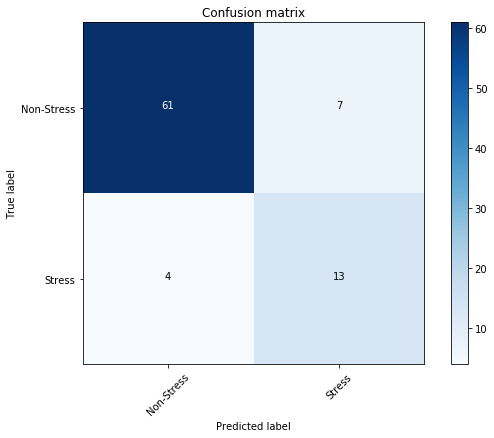

In [58]:
#Self Modified scikit-learn code 
classes=["Non-Stress","Stress"]
result1 = np.array(labels2.iloc[:,0])
cnf = confusion_matrix(result1, result)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf, classes,
                      title='Confusion matrix')
plt.show()